<a href="https://colab.research.google.com/github/blaim/2025-1-vision/blob/main/HW2/HW2-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fig0940(a)(rice_image_with_intensity_gradient).tif to Fig0940(a)(rice_image_with_intensity_gradient) (7).tif


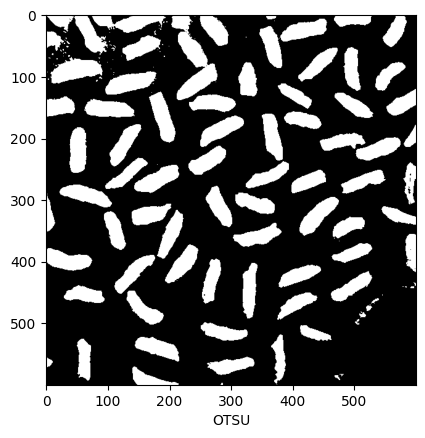

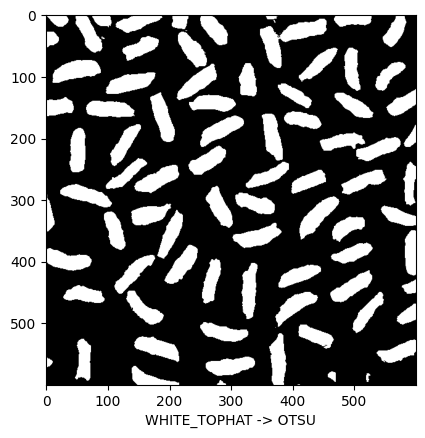

In [17]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 이미지 업로드(코랩 이미지 업로드 기능 이용)
uploaded = files.upload()

filename = list(uploaded.keys())[0]

image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

#크기 작으면 쌀알 잘 못보니 최대한 크게
se = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
###########a
##단순Ostu 이진화
#############
t, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

############
##white-top hat 전처리 후 otsu 이진화
################
#white top hat(원본 - opening)
#opening연산
eroded = cv2.erode(image, se, iterations=1)
opening = cv2.dilate(eroded, se, iterations=1)

#원본 - opening
white_tophat = cv2.subtract(image, opening)

#tophat 후 otsu 이진화
t, tophat_otsu = cv2.threshold(white_tophat, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#단순 otsu연산 출력
plt.imshow(otsu,cmap='gray')
plt.xlabel('OTSU')
plt.show()

#white top hat 후 otsu연산 출력
plt.imshow(tophat_otsu,cmap='gray')
plt.xlabel('WHITE_TOPHAT -> OTSU')
plt.show()

#단순 otsu만 적용하면 조명이 균일하지 않아 밑부분이 약간 잘리는데
#white top hat 연산을 통해 밝은것들 강조 후 otsu 연산 시 더욱 잘 구분된다

In [ ]:
#